In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
df = pd.read_csv("PJME_hourly.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
df.set_index("Datetime", inplace=True)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<Axes: title={'center': 'PJME Hourly Energy Consumption'}, xlabel='Datetime'>

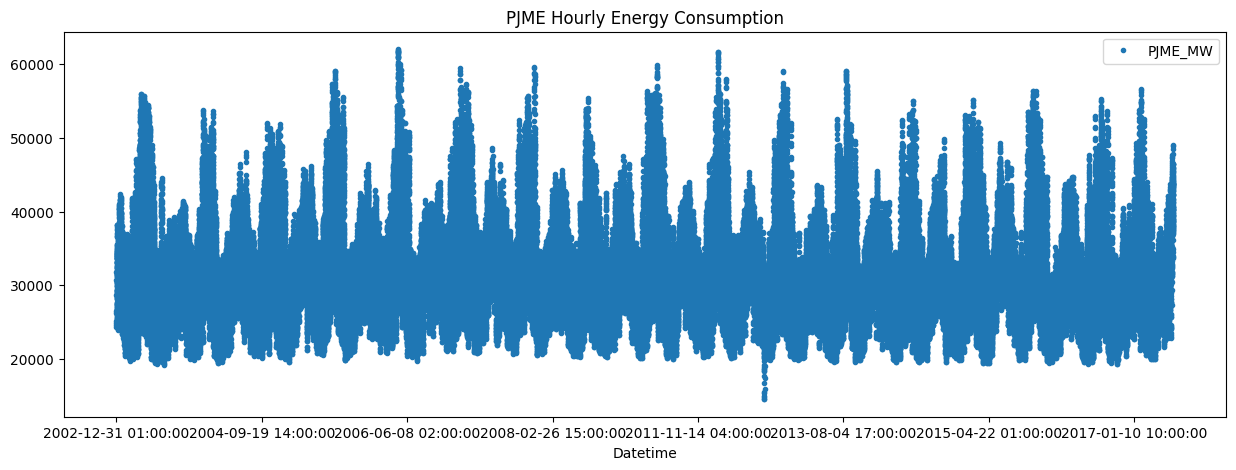

In [4]:
df.plot(style= '.',figsize=(15, 5), title='PJME Hourly Energy Consumption')

In [5]:
df.index.dtype

dtype('O')

In [6]:
df.index = pd.to_datetime(df.index)
df.index.dtype

dtype('<M8[ns]')

# Train / Test split

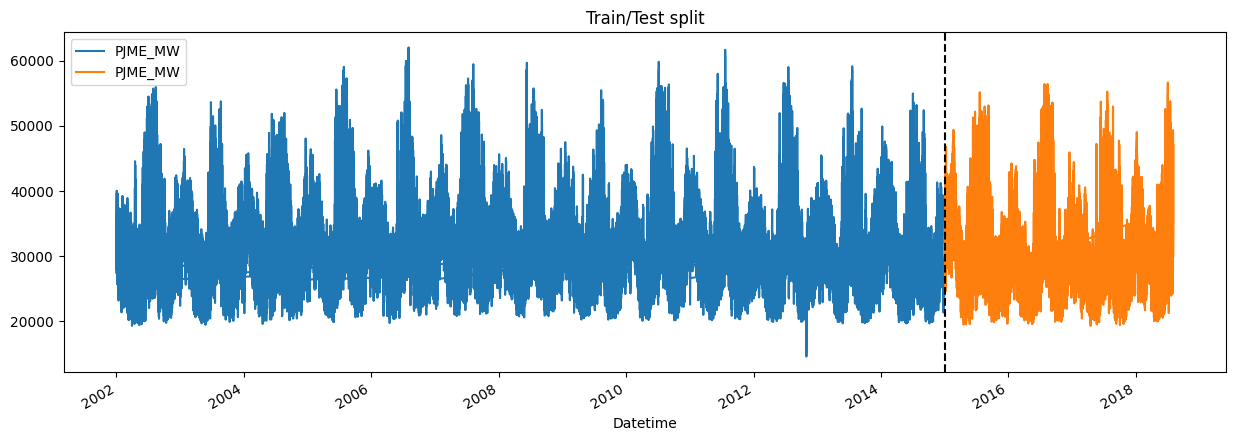

In [7]:
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set' , title='Train/Test split')
test.plot(ax=ax, label='Test set')
ax.axvline('2015-01-01', color='black', ls='--')
plt.show()

<Axes: title={'center': 'First week of 2010'}, xlabel='Datetime'>

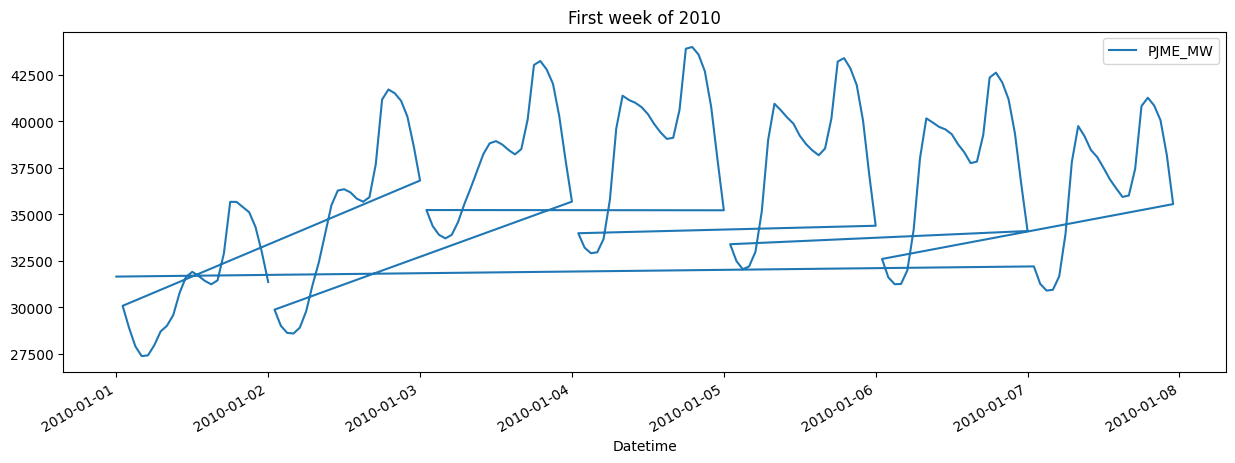

In [8]:
week1_2010 = df.loc[(df.index >= '2010-01-01') & (df.index < '2010-01-08')]
week1_2010.plot(figsize=(15,5), title='First week of 2010')

# Feature Creation

In [17]:
def create_features(df):
    """
    create time series feature based on time series index
    """

    df = df.copy()
    df["hours"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear

    return df

In [10]:
df = create_features(df)
df.head()

,PJME_MW,hours,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


# Visualize our Feature / Target Relationship

<Axes: xlabel='hours', ylabel='PJME_MW'>

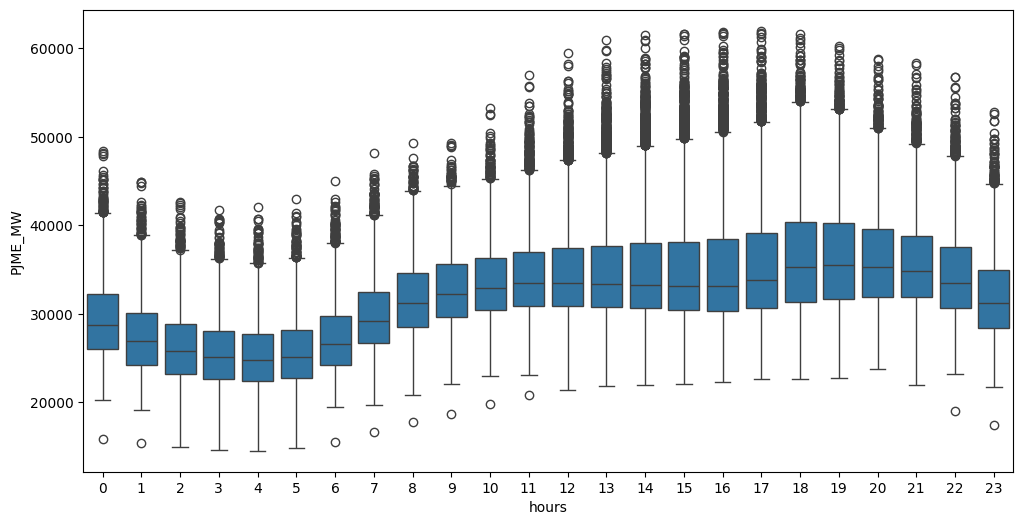

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x="hours", y="PJME_MW", ax=ax)

In [12]:
"""
so we can see that enrgy consumption in evening is high than morning
"""

'\nso we can see that enrgy consumption in evening is high than morning\n'

<Axes: xlabel='month', ylabel='PJME_MW'>

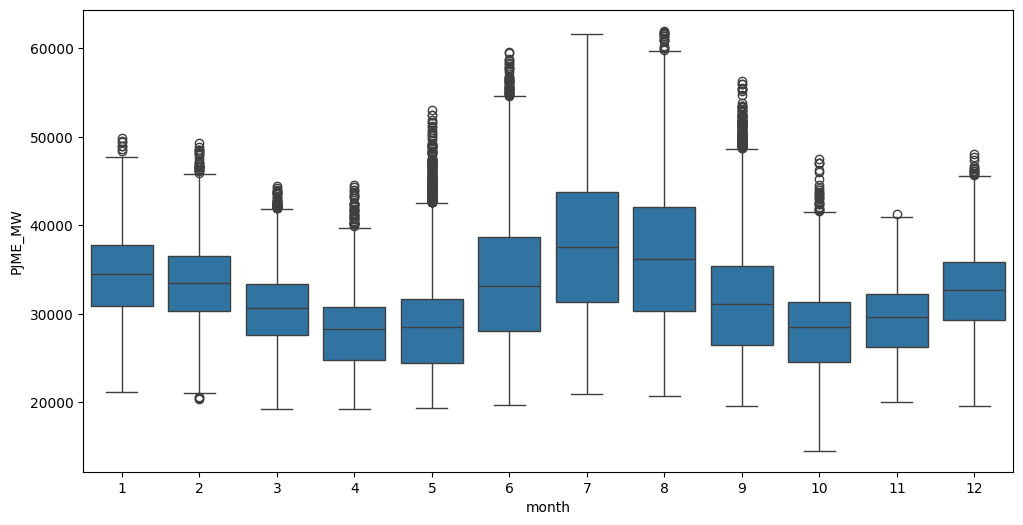

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x="month", y="PJME_MW", ax=ax)

In [14]:
"""
so we can see that in summer season energy comsumming is high
"""

'\nso we can see that in summer season energy comsumming is high\n'

# Create Model

In [18]:
train = create_features(train)
test = create_features(test)

In [19]:
df.columns

Index(['PJME_MW', 'hours', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [20]:
features = ['PJME_MW', 'hours', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
target = 'PJME_MW'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target] 

In [21]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6387.88729	validation_1-rmse:6456.57262
[100]	validation_0-rmse:2345.32420	validation_1-rmse:2362.62680
[200]	validation_0-rmse:869.17458	validation_1-rmse:863.95488
[300]	validation_0-rmse:341.11551	validation_1-rmse:322.97738
[400]	validation_0-rmse:171.23626	validation_1-rmse:138.93940
[500]	validation_0-rmse:129.89698	validation_1-rmse:91.57005
[600]	validation_0-rmse:119.48152	validation_1-rmse:83.97523
[700]	validation_0-rmse:115.09522	validation_1-rmse:82.49521
[772]	validation_0-rmse:112.40777	validation_1-rmse:82.64665


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None
